Step 1: Mount Google **Drive**

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

!pip install librosa matplotlib
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


Step 2: Load and Process Audio Files

We'll use the librosa library to handle audio files and generate more spectrograms features, and matplotlib to display or save them. Install the necessary libraries if they’re not already installed

In [ ]:
!pip install librosa matplotlib

In [ ]:
#solo music
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the path to your Google Drive folder containing audio files
folder_path = '/content/drive/MyDrive/ece446project/morefeatures/solo'  # Replace with your actual folder path

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found. Please check the path.")
else:
    # Create a directory to save feature analysis results and plots
    results_path = os.path.join(folder_path, "Analysis_Results")
    plots_path = os.path.join(folder_path, "Feature_Plots")
    os.makedirs(results_path, exist_ok=True)
    os.makedirs(plots_path, exist_ok=True)

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an audio file (e.g., .wav, .m4a)
        if filename.endswith('.wav') or filename.endswith('.m4a'):
            file_path = os.path.join(folder_path, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            # Generate the Mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Compute spectral features
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).flatten()
            spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).flatten()
            spectral_flatness = librosa.feature.spectral_flatness(y=y).flatten()

            # Compute spectral entropy
            S_normalized = S / np.sum(S, axis=0, keepdims=True)  # Normalize to sum to 1 along time
            spectral_entropy = -np.sum(S_normalized * np.log(S_normalized + 1e-10), axis=0)  # Add small value to avoid log(0)

            # Plot the features
            time = np.linspace(0, len(y) / sr, len(spectral_centroid))

            plt.figure(figsize=(12, 8))

            # Spectral Centroid
            plt.subplot(4, 1, 1)
            plt.plot(time, spectral_centroid, color='b')
            plt.title(f"Spectral Centroid of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Centroid (Hz)")

            # Spectral Roll-off
            plt.subplot(4, 1, 2)
            plt.plot(time, spectral_rolloff, color='r')
            plt.title(f"Spectral Roll-off of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Roll-off Frequency (Hz)")

            # Spectral Flatness
            plt.subplot(4, 1, 3)
            plt.plot(time, spectral_flatness, color='g')
            plt.title(f"Spectral Flatness of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Flatness")

            # Spectral Entropy
            plt.subplot(4, 1, 4)
            plt.plot(time, spectral_entropy, color='m')
            plt.title(f"Spectral Entropy of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Entropy")

            plt.tight_layout()

            # Save the plot
            plot_save_path = os.path.join(plots_path, f"{filename}_features_plot.png")
            plt.savefig(plot_save_path)
            plt.close()

            print(f"Feature plots for {filename} saved at {plot_save_path}.")


<ipython-input-6-d0ef6b2a28dd>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for KazooG.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/solo/Feature_Plots/KazooG.m4a_features_plot.png.


<ipython-input-6-d0ef6b2a28dd>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for FluteG.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/solo/Feature_Plots/FluteG.m4a_features_plot.png.


<ipython-input-6-d0ef6b2a28dd>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for tongue drum.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/solo/Feature_Plots/tongue drum.m4a_features_plot.png.


<ipython-input-6-d0ef6b2a28dd>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for timpani.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/solo/Feature_Plots/timpani.m4a_features_plot.png.


<ipython-input-6-d0ef6b2a28dd>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for kalimba.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/solo/Feature_Plots/kalimba.m4a_features_plot.png.


In [ ]:
#chamber music
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the path to your Google Drive folder containing audio files
folder_path = '/content/drive/MyDrive/ece446project/morefeatures/chamber'  # Replace with your actual folder path

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found. Please check the path.")
else:
    # Create a directory to save feature analysis results and plots
    results_path = os.path.join(folder_path, "Analysis_Results")
    plots_path = os.path.join(folder_path, "Feature_Plots")
    os.makedirs(results_path, exist_ok=True)
    os.makedirs(plots_path, exist_ok=True)

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an audio file (e.g., .wav, .m4a)
        if filename.endswith('.wav') or filename.endswith('.m4a'):
            file_path = os.path.join(folder_path, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            # Generate the Mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Compute spectral features
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).flatten()
            spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85).flatten()
            spectral_flatness = librosa.feature.spectral_flatness(y=y).flatten()

            # Compute spectral entropy
            S_normalized = S / np.sum(S, axis=0, keepdims=True)  # Normalize to sum to 1 along time
            spectral_entropy = -np.sum(S_normalized * np.log(S_normalized + 1e-10), axis=0)  # Add small value to avoid log(0)

            # Plot the features
            time = np.linspace(0, len(y) / sr, len(spectral_centroid))

            plt.figure(figsize=(12, 8))

            # Spectral Centroid
            plt.subplot(4, 1, 1)
            plt.plot(time, spectral_centroid, color='b')
            plt.title(f"Spectral Centroid of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Centroid (Hz)")

            # Spectral Roll-off
            plt.subplot(4, 1, 2)
            plt.plot(time, spectral_rolloff, color='r')
            plt.title(f"Spectral Roll-off of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Roll-off Frequency (Hz)")

            # Spectral Flatness
            plt.subplot(4, 1, 3)
            plt.plot(time, spectral_flatness, color='g')
            plt.title(f"Spectral Flatness of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Flatness")

            # Spectral Entropy
            plt.subplot(4, 1, 4)
            plt.plot(time, spectral_entropy, color='m')
            plt.title(f"Spectral Entropy of {filename}")
            plt.xlabel("Time (s)")
            plt.ylabel("Entropy")

            plt.tight_layout()

            # Save the plot
            plot_save_path = os.path.join(plots_path, f"{filename}_features_plot.png")
            plt.savefig(plot_save_path)
            plt.close()

            print(f"Feature plots for {filename} saved at {plot_save_path}.")


<ipython-input-13-aa56d4a84e1d>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for kazoo and tongue drum.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/Feature_Plots/kazoo and tongue drum.m4a_features_plot.png.


<ipython-input-13-aa56d4a84e1d>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for kazoo and timpani.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/Feature_Plots/kazoo and timpani.m4a_features_plot.png.


<ipython-input-13-aa56d4a84e1d>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for kazoo and kalimba.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/Feature_Plots/kazoo and kalimba.m4a_features_plot.png.


<ipython-input-13-aa56d4a84e1d>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for flute and tongue drum.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/Feature_Plots/flute and tongue drum.m4a_features_plot.png.


<ipython-input-13-aa56d4a84e1d>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for flute and kalimba.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/Feature_Plots/flute and kalimba.m4a_features_plot.png.


<ipython-input-13-aa56d4a84e1d>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Feature plots for flute and timpani.m4a saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/Feature_Plots/flute and timpani.m4a_features_plot.png.


Step 3: do ANOVA comparisions for all solo & chamber recordings based on fundemental frequency

In [ ]:
import os
import librosa
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the path to your Google Drive folder containing audio files
folder_path = '/content/drive/MyDrive/ece446project/morefeatures/solo'  # Replace with your actual folder path

# Define a folder to save the ANOVA plot
plots_path = os.path.join(folder_path, "ANOVA_Plots")
os.makedirs(plots_path, exist_ok=True)

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found. Please check the path.")
else:
    # Dictionary to store fundamental frequencies for each file
    f0_data = {}

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an audio file (e.g., .wav, .m4a)
        if filename.endswith('.wav') or filename.endswith('.m4a'):
            file_path = os.path.join(folder_path, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            # Estimate the fundamental frequency (f0)
            f0, voiced_flags, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

            # Filter out NaN values (unvoiced segments)
            f0_cleaned = f0[~np.isnan(f0)]

            # Store the cleaned f0 values for the file
            f0_data[filename] = f0_cleaned

    # Ensure there are enough files for ANOVA
    if len(f0_data) < 2:
        print("Not enough files with fundamental frequency data for ANOVA.")
    else:
        # Prepare data for ANOVA test
        groups = list(f0_data.keys())
        f0_values = list(f0_data.values())

        # Perform one-way ANOVA test
        f_stat, p_value = stats.f_oneway(*f0_values)

        # Output the results
        print("ANOVA Test Results:")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")

        # Interpret the results
        if p_value < 0.05:
            print("There is a statistically significant difference in the fundamental frequencies between the files.")
        else:
            print("There is no statistically significant difference in the fundamental frequencies between the files.")

        # Plot the distributions of f0 for each file
        plt.figure(figsize=(12, 6))
        for i, (filename, f0_vals) in enumerate(f0_data.items()):
            plt.hist(f0_vals, bins=50, alpha=0.5, label=filename)
        plt.title("Fundamental Frequency Distributions")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Count")
        plt.legend(loc='upper right')
        plt.tight_layout()

        # Save the plot
        anova_plot_path = os.path.join(plots_path, "ANOVA_Fundamental_Frequency.png")
        plt.savefig(anova_plot_path)
        plt.close()

        print(f"ANOVA plot saved at {anova_plot_path}.")


<ipython-input-5-796a7784d8d4>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-5-796a7784d8d4>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-5-796a7784d8d4>:28: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarni

ANOVA Test Results:
F-statistic: 556.2896360482551
P-value: 1.2991456e-317
There is a statistically significant difference in the fundamental frequencies between the files.
ANOVA plot saved at /content/drive/MyDrive/ece446project/morefeatures/solo/ANOVA_Plots/ANOVA_Fundamental_Frequency.png.


In [ ]:
#chamber chamber chamber

# Define the path to your Google Drive folder containing audio files
folder_path = '/content/drive/MyDrive/ece446project/morefeatures/chamber'  # Replace with your actual folder path

# Define a folder to save the ANOVA plot
plots_path = os.path.join(folder_path, "ANOVA_Plots")
os.makedirs(plots_path, exist_ok=True)

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found. Please check the path.")
else:
    # Dictionary to store fundamental frequencies for each file
    f0_data = {}

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an audio file (e.g., .wav, .m4a)
        if filename.endswith('.wav') or filename.endswith('.m4a'):
            file_path = os.path.join(folder_path, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            # Estimate the fundamental frequency (f0)
            f0, voiced_flags, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

            # Filter out NaN values (unvoiced segments)
            f0_cleaned = f0[~np.isnan(f0)]

            # Store the cleaned f0 values for the file
            f0_data[filename] = f0_cleaned

    # Ensure there are enough files for ANOVA
    if len(f0_data) < 2:
        print("Not enough files with fundamental frequency data for ANOVA.")
    else:
        # Prepare data for ANOVA test
        groups = list(f0_data.keys())
        f0_values = list(f0_data.values())

        # Perform one-way ANOVA test
        f_stat, p_value = stats.f_oneway(*f0_values)

        # Output the results
        print("ANOVA Test Results:")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")

        # Interpret the results
        if p_value < 0.05:
            print("There is a statistically significant difference in the fundamental frequencies between the files.")
        else:
            print("There is no statistically significant difference in the fundamental frequencies between the files.")

        # Plot the distributions of f0 for each file
        plt.figure(figsize=(12, 6))
        for i, (filename, f0_vals) in enumerate(f0_data.items()):
            plt.hist(f0_vals, bins=50, alpha=0.5, label=filename)
        plt.title("Fundamental Frequency Distributions")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Count")
        plt.legend(loc='upper right')
        plt.tight_layout()

        # Save the plot
        anova_plot_path = os.path.join(plots_path, "ANOVA_Fundamental_Frequency.png")
        plt.savefig(anova_plot_path)
        plt.close()

        print(f"ANOVA plot saved at {anova_plot_path}.")


<ipython-input-17-7a9ed4e51087>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-17-7a9ed4e51087>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-17-7a9ed4e51087>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWa

ANOVA Test Results:
F-statistic: 2337.654826974393
P-value: 0.0
There is a statistically significant difference in the fundamental frequencies between the files.
ANOVA plot saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/ANOVA_Plots/ANOVA_Fundamental_Frequency.png.


Step 4: ANOVA Test for solo and chamber recordings based on audio power (RMS power)

In [ ]:
#solo

# Define the path to your Google Drive folder containing audio files
folder_path = '/content/drive/MyDrive/ece446project/morefeatures/solo'  # Replace with your actual folder path

# Define a folder to save the ANOVA plot
plots_path = os.path.join(folder_path, "ANOVA_Plots")
os.makedirs(plots_path, exist_ok=True)

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found. Please check the path.")
else:
    # Dictionary to store audio power for each file
    power_data = {}

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an audio file (e.g., .wav, .m4a)
        if filename.endswith('.wav') or filename.endswith('.m4a'):
            file_path = os.path.join(folder_path, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            # Compute audio power (RMS energy)
            rms = librosa.feature.rms(y=y).flatten()
            power_data[filename] = rms

    # Ensure there are enough files for ANOVA
    if len(power_data) < 2:
        print("Not enough files with audio power data for ANOVA.")
    else:
        # Prepare data for ANOVA test
        groups = list(power_data.keys())
        power_values = list(power_data.values())

        # Perform one-way ANOVA test
        f_stat, p_value = stats.f_oneway(*power_values)

        # Output the results
        print("ANOVA Test Results (Audio Power):")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")

        # Interpret the results
        if p_value < 0.05:
            print("There is a statistically significant difference in audio power between the files.")
        else:
            print("There is no statistically significant difference in audio power between the files.")

        # Plot the distributions of audio power for each file
        plt.figure(figsize=(12, 6))
        for i, (filename, rms_vals) in enumerate(power_data.items()):
            plt.hist(rms_vals, bins=50, alpha=0.5, label=filename)
        plt.title("Audio Power Distributions (RMS Energy)")
        plt.xlabel("Power (RMS Energy)")
        plt.ylabel("Count")
        plt.legend(loc='upper right')
        plt.tight_layout()

        # Save the plot
        anova_power_plot_path = os.path.join(plots_path, "ANOVA_Audio_Power.png")
        plt.savefig(anova_power_plot_path)
        plt.close()

        print(f"Audio Power ANOVA plot saved at {anova_power_plot_path}.")


<ipython-input-20-b2103379c884>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-20-b2103379c884>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-20-b2103379c884>:24: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWa

ANOVA Test Results (Audio Power):
F-statistic: 235.59625899891935
P-value: 4.8878154803231944e-194
There is a statistically significant difference in audio power between the files.
Audio Power ANOVA plot saved at /content/drive/MyDrive/ece446project/morefeatures/solo/ANOVA_Plots/ANOVA_Audio_Power.png.


In [ ]:
#chamber chamber
#solo

# Define the path to your Google Drive folder containing audio files
folder_path = '/content/drive/MyDrive/ece446project/morefeatures/chamber'  # Replace with your actual folder path

# Define a folder to save the ANOVA plot
plots_path = os.path.join(folder_path, "ANOVA_Plots")
os.makedirs(plots_path, exist_ok=True)

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found. Please check the path.")
else:
    # Dictionary to store audio power for each file
    power_data = {}

    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an audio file (e.g., .wav, .m4a)
        if filename.endswith('.wav') or filename.endswith('.m4a'):
            file_path = os.path.join(folder_path, filename)

            # Load the audio file
            y, sr = librosa.load(file_path)

            # Compute audio power (RMS energy)
            rms = librosa.feature.rms(y=y).flatten()
            power_data[filename] = rms

    # Ensure there are enough files for ANOVA
    if len(power_data) < 2:
        print("Not enough files with audio power data for ANOVA.")
    else:
        # Prepare data for ANOVA test
        groups = list(power_data.keys())
        power_values = list(power_data.values())

        # Perform one-way ANOVA test
        f_stat, p_value = stats.f_oneway(*power_values)

        # Output the results
        print("ANOVA Test Results (Audio Power):")
        print(f"F-statistic: {f_stat}")
        print(f"P-value: {p_value}")

        # Interpret the results
        if p_value < 0.05:
            print("There is a statistically significant difference in audio power between the files.")
        else:
            print("There is no statistically significant difference in audio power between the files.")

        # Plot the distributions of audio power for each file
        plt.figure(figsize=(12, 6))
        for i, (filename, rms_vals) in enumerate(power_data.items()):
            plt.hist(rms_vals, bins=50, alpha=0.5, label=filename)
        plt.title("Audio Power Distributions (RMS Energy)")
        plt.xlabel("Power (RMS Energy)")
        plt.ylabel("Count")
        plt.legend(loc='upper right')
        plt.tight_layout()

        # Save the plot
        anova_power_plot_path = os.path.join(plots_path, "ANOVA_Audio_Power.png")
        plt.savefig(anova_power_plot_path)
        plt.close()

        print(f"Audio Power ANOVA plot saved at {anova_power_plot_path}.")


<ipython-input-21-96465257d38b>:25: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-21-96465257d38b>:25: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-21-96465257d38b>:25: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWa

ANOVA Test Results (Audio Power):
F-statistic: 282.20577356060994
P-value: 1.8487848943332294e-282
There is a statistically significant difference in audio power between the files.
Audio Power ANOVA plot saved at /content/drive/MyDrive/ece446project/morefeatures/chamber/ANOVA_Plots/ANOVA_Audio_Power.png.


Step 5: T-test among two recordings

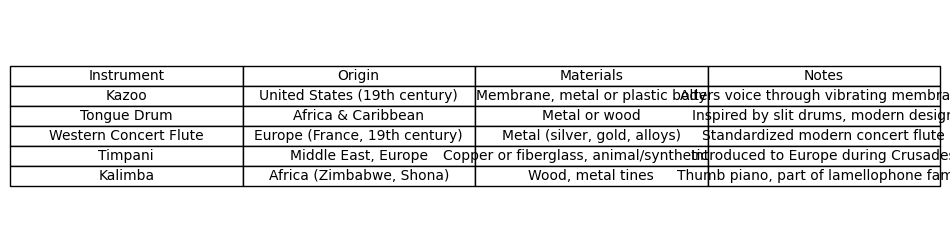

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the data
data = {
    "Instrument": ["Kazoo", "Tongue Drum", "Western Concert Flute", "Timpani", "Kalimba"],
    "Origin": ["United States (19th century)", "Africa & Caribbean", "Europe (France, 19th century)",
               "Middle East, Europe", "Africa (Zimbabwe, Shona)"],
    "Materials": ["Membrane, metal or plastic body", "Metal or wood", "Metal (silver, gold, alloys)",
                  "Copper or fiberglass, animal/synthetic skin", "Wood, metal tines"],
    "Notes": ["Alters voice through vibrating membrane", "Inspired by slit drums, modern design",
              "Standardized modern concert flute", "Introduced to Europe during Crusades",
              "Thumb piano, part of lamellophone family"]
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Set up a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))  # You can adjust the figure size as needed

# Hide axes
ax.axis('off')

# Create a table plot using matplotlib
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust table size

# Save the table as an image
plt.savefig('instruments_table_image.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

